
# Exercise 02
### Time Series Analysis
* The result will be evaluated from a report in Jupyter, which must be found in a public GitHub repository.
* The project must be carried out in the groups assigned in class.
* Use clear and rigorous procedures.
* Due date: July 11, 2021, 11:59 pm, through Bloque Neón + (Upload repository link)
### 02.1 Download and explore one series from Google Trends
#### In your analysis, be sure to answer:


* 1. Is the time series stationary?
* 2. Construct and plot the trend component of the time series
* 3. Construct and plot the seasonal component of the time series
* 4. Is the detrended time series stationary?
* 5. Construct a plot to analyze the autocorrelation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset: Interés de bíusqueda de la palabra Petróleo en google para Colombia


Los datos seleccionados corresponden a la serie de Google Trends Oil, la cual mide la popularidad de 'Oil' a nivel regional en Colombia en cuanto a tendencias de google (búsquedas de ese término en el motor de Google por los usuarios de internet). La variable de respuesta mide la popularidad por cada mes en una escala de 0 a 100, siendo este último el valor de mayor popularidad que obtuvo la palabra en una fecha específica.

El rango de fechas del data set va desde el enero de 2004 hasta el julio  de 2021

https://trends.google.com/trends/explore?date=all&geo=CO&q=oil

In [17]:
plt.style.use('classic')

In [21]:
df = pd.read_clipboard(sep=',')

In [23]:
df.head()

,Mes,oil: (Colombia)
0,2004-01,84
1,2004-02,56
2,2004-03,48
3,2004-04,81
4,2004-05,42


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Mes              211 non-null    object
 1   oil: (Colombia)  211 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.4+ KB


El dataset cuenta con dos variables, una con la fecha de la medición de la popularidad de la palabara 'Oil' y el valor porcentual de la popularidad ( de 0 a 100)

In [25]:
df.columns = ['month', 'oil']

In [26]:
df.head()

,month,oil
0,2004-01,84
1,2004-02,56
2,2004-03,48
3,2004-04,81
4,2004-05,42


In [28]:
# Se ajusta el formato a fecha para el campo de 'month' :


df.month = pd.to_datetime(df['month'])

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   month   211 non-null    datetime64[ns]
 1   oil     211 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.4 KB


In [30]:
# Se deja el campo de month como el índice del dataframe:

df.set_index('month', inplace=True)

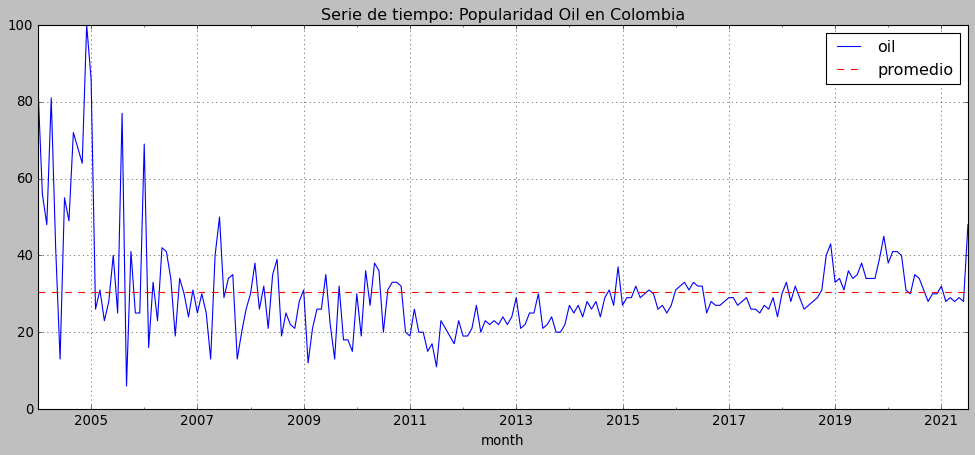

In [33]:
# Se grafica la serie:

df.plot(figsize=(15,6), title='Serie de tiempo: Popularidad Oil en Colombia', grid=True)
plt.axhline(df["oil"].mean(), color ="red", linestyle="dashed", label='promedio')
plt.legend();

# 1. Prueba de estacionalidad

In [34]:
from statsmodels.tsa.stattools import adfuller

In [35]:
adfuller(df)

(-3.391532577848219,
 0.011250934586182535,
 15,
 195,
 {'1%': -3.464337030867007,
  '5%': -2.876478799035722,
  '10%': -2.574733103221565},
 1336.7414358856613)

Dado que el p_value es < 0.05 (0.01) , no se acepta H0 (rho - 1 = 0): Rho es estadísticamente igual a 1, 
es decir, Rho -1 es estadísticamente diferente a 0 -> La serie es estacionaria.

# 2. Construir y graficar el componente de tendencia de la serie

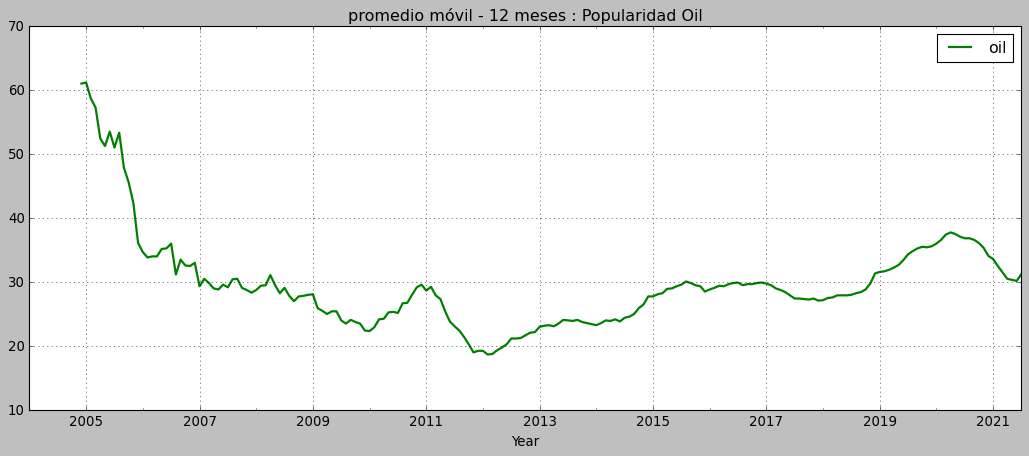

In [37]:
df.rolling(12).mean().plot(figsize=(16,6), title='promedio móvil - 12 meses : Popularidad Oil', grid=True,
                          linewidth=2, color='green')
plt.xlabel('Year');

# 3. Construir gráfico de estacionalidad (diff)

Se generan las diferencias entre un periodo (p=1) para la serie usando el método .diff de Pandas

In [38]:
df_dif = df.diff()

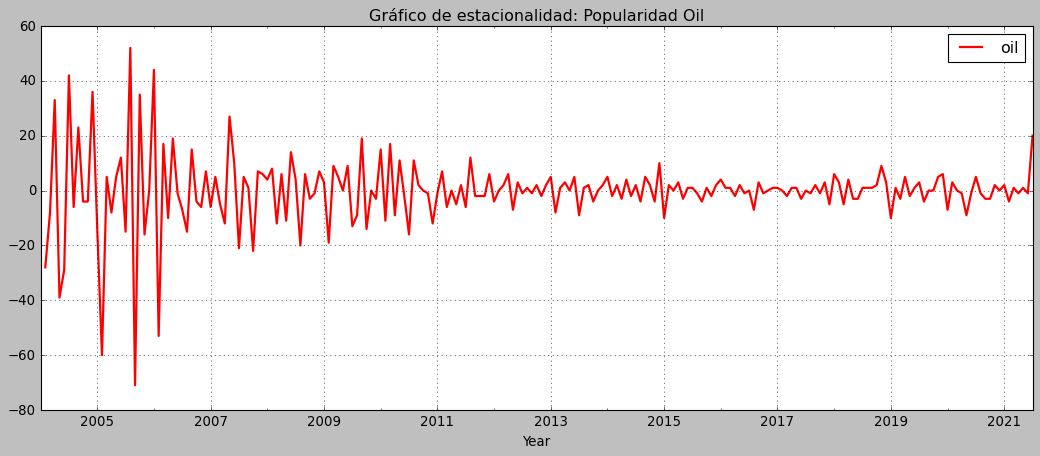

In [39]:
df_dif.plot(figsize=(16,6), title='Gráfico de estacionalidad: Popularidad Oil', grid=True,
                          linewidth=2, color='red')
plt.xlabel('Year');

Se observa como las diferencias de a un periodo de la serie no dan señales de estacionalidad ya que su comportamiento varía a lo largo del tiempo.

# 4. Is the detrended time series stationary?

Se realiza la prueba de Dickey-Fuller a la serie diferenciada (en un periodo):

In [42]:
res = []
c_val = ["c","ct","ctt","nc"]

for i in c_val:
    res.append( adfuller(df_dif.iloc[1:], regression=i )[1] )
    
pd.DataFrame(index=c_val, data=res, columns=['p_value'])

,p_value
c,1.030639e-05
ct,3.107402e-05
ctt,6.256816e-05
nc,4.236401e-07


In [41]:
adfuller(df_dif.iloc[1:])

(-5.166109463515575,
 1.0306392153446224e-05,
 14,
 195,
 {'1%': -3.464337030867007,
  '5%': -2.876478799035722,
  '10%': -2.574733103221565},
 1326.804732183308)

Dado que el p_value es < 0.05 (0.000001) , no se acepta H0 (rho - 1 = 0): Rho es estadísticamente igual a 1, 
es decir, Rho -1 es estadísticamente diferente a 0 -> La serie es estacionaria.

# 5. Construir y analizar el gráfico de autocorrelación de la serie

La gráfica de autocorrelación se hace para la serie original con la ayuda de la funcionalidad pd.plotting.autocorrelation_plot de Pandas:

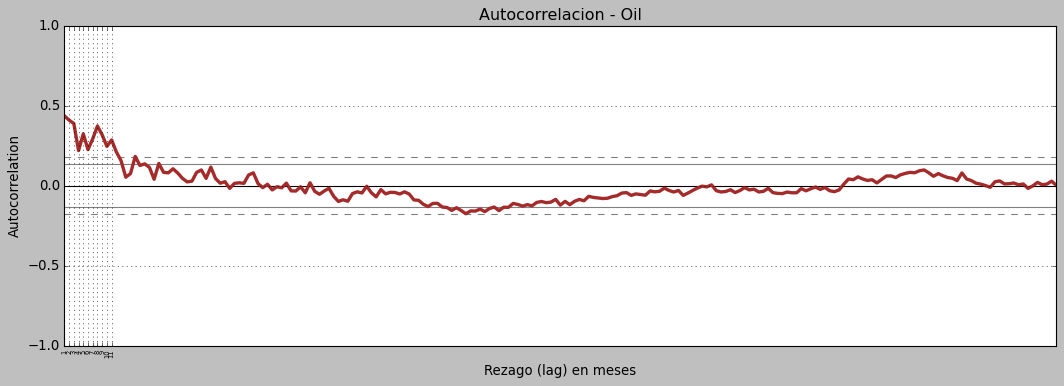

In [55]:
plt.figure(figsize=(16,5))
pd.plotting.autocorrelation_plot(df,linewidth=3, color='brown')
plt.title('Autocorrelacion - Oil')
plt.xlabel('Rezago (lag) en meses')
plt.xticks(np.arange(1,12), rotation=90, fontsize=6);

Al observar la gráfica de autocorrelación se puede hacer un indicio de que la serie tiene una periodicidad de 11 meses ya que después de este rezago, la autocorrelación es mucho más pequeña (está dentro del intervalo de confianza para los valores de autocorrelación cercanos a cero).